In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

data_m = pd.read_csv("Cadena_Productiva_Maiz_-_Area__Produccion_Y_Rendimiento.csv")
data_t = pd.read_csv("tmean_gathered.csv")

# %matplotlib notebook

In [21]:
# data_t.head(3)
data_m.head(3)

,CÓD. DEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO DE CULTIVO,SUBGRUPO DE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,CÓDIGO CULTIVO,NOMBRE CIENTIFICO,PERIODO,Área Sembrada(ha),Área Cosechada(ha),Producción(t),Rendimiento(t/ha),ESTADO FISICO PRODUCCION
0,5,ANTIOQUIA,5579,PUERTO BERRIO,CEREALES,MAIZ FORRAJERO,MAIZ FORRAJERO,MAIZ FORRAJERO,1060101,ZEA MAYS,2018A,150,150,4200,28.0,GRANO SECO
1,5,ANTIOQUIA,5400,LA UNION,CEREALES,MAIZ FORRAJERO,MAIZ FORRAJERO,MAIZ FORRAJERO,1060101,ZEA MAYS,2018A,23,22,726,33.0,GRANO SECO
2,20,CESAR,20250,EL PASO,CEREALES,MAIZ FORRAJERO,MAIZ FORRAJERO,MAIZ FORRAJERO,1060101,ZEA MAYS,2018A,320,74,222,3.0,GRANO SECO


In [58]:
indices_t = ['COD_DPTO', 'DPTOMPIO', 'SEMESTRE', 'TMEAN']
indices_m = ['CÓD. DEP.', 'CÓD. MUN.', 'PERIODO', 'Rendimiento(t/ha)', 'Producción(t)', 'Área Cosechada(ha)', 'Área Sembrada(ha)']


data_mm = data_m[data_m['Producción(t)'] != 0.]
# data_m.drop_duplicates(subset = indices_m[:-1])
dd = data_mm.groupby(by = indices_m[:-1], axis = 0, as_index = False).mean()

merged = dd[indices_m].merge(right = data_t[indices_t], how = 'inner', left_on = indices_m[:3], right_on = indices_t[:3])[indices_t[:] + indices_m[3:]]
# merged = merged.drop_duplicates(subset = indices_m[:-1])


In [59]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7408 entries, 0 to 7407
Data columns (total 8 columns):
COD_DPTO              7408 non-null int64
DPTOMPIO              7408 non-null int64
SEMESTRE              7408 non-null object
TMEAN                 7404 non-null float64
Rendimiento(t/ha)     7408 non-null float64
Producción(t)         7408 non-null int64
Área Cosechada(ha)    7408 non-null int64
Área Sembrada(ha)     7408 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 520.9+ KB


In [60]:
merged.head(3)

,COD_DPTO,DPTOMPIO,SEMESTRE,TMEAN,Rendimiento(t/ha),Producción(t),Área Cosechada(ha),Área Sembrada(ha)
0,5,5002,2015A,19.640895,1.4,420,300,300
1,5,5002,2015B,20.420068,1.4,364,260,300
2,5,5002,2016A,20.587932,1.4,420,300,40


In [67]:
set(merged['COD_DPTO'])

{5,
 8,
 13,
 15,
 17,
 18,
 19,
 20,
 23,
 25,
 27,
 41,
 44,
 47,
 50,
 52,
 54,
 63,
 66,
 68,
 70,
 73,
 76,
 81,
 85,
 86,
 88,
 91,
 94,
 95,
 97,
 99}

In [84]:
m_gb = merged.groupby(by = indices_t[0], axis = 0).mean()

In [85]:
m_gb.head()

,DPTOMPIO,TMEAN,Rendimiento(t/ha),Producción(t),Área Cosechada(ha),Área Sembrada(ha)
COD_DPTO,,,,,,
5,5432.645425,21.456830,2.109314,306.199346,159.290850,161.359477
8,8514.166667,29.252065,1.621605,229.302469,145.123457,189.074074
13,13464.361111,27.764852,1.548148,1237.391975,733.447531,919.589506
15,15493.166071,17.203582,1.375714,77.273214,53.907143,43.128571
17,17443.437186,21.312269,3.252261,231.055276,29.859296,26.733668


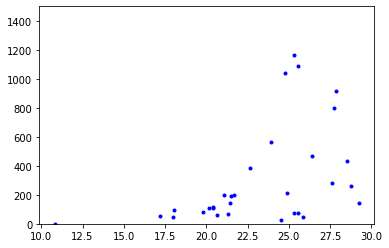

In [95]:
colour = ['b', 'g', 'r', 'c']

plt.figure()
plt.plot(m_gb['TMEAN'], 1/m_gb['Rendimiento(t/ha)']*m_gb['Producción(t)'], colour[j]+'.')
plt.ylim((0,1500))
plt.show()

In [63]:
merged['Rendimiento(t/ha)']

0       28.0
1       33.0
2        1.6
3        3.0
4        0.8
        ... 
8494     6.0
8495     7.0
8496     7.0
8497     8.0
8498     7.5
Name: Rendimiento(t/ha), Length: 8499, dtype: float64

In [25]:
# len(mm)
len(tm)

7882

In [31]:
len(set(tm[tm.isin(mm)])) # Cantidad de municipios que coinciden entre ambas tablas

609

CÓD. DEP.
DEPARTAMENTO
CÓD. MUN.
MUNICIPIO
GRUPO DE CULTIVO
SUBGRUPO DE CULTIVO
CULTIVO
DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO
CÓDIGO CULTIVO
NOMBRE CIENTIFICO
PERIODO
Área Sembrada(ha)
Área Cosechada(ha)
Producción(t)
Rendimiento(t/ha)
ESTADO FISICO PRODUCCION


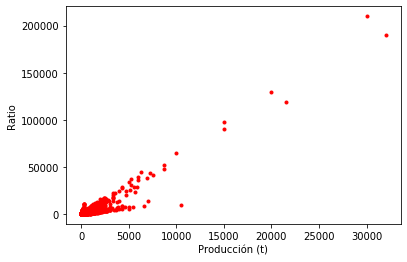

In [13]:
    
ratio = [cos/sem if (sem != 0) else -1 for cos, sem in zip(data['Área Cosechada(ha)'].values, data['Área Sembrada(ha)'].values)]
rend = data['Rendimiento(t/ha)'].values
prod = data['Producción(t)'].values

ratio = np.array(ratio)
rend = np.array(rend)
prod = np.array(prod)
cos = np.array(data['Área Cosechada(ha)'].values)